<h1 style="text-align: center;">  Final Project </h1>


<h2 style="text-align: center;"> Part B: Customer Churn Prediction </h2>

In [3]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tabulate import tabulate

### 1. Data Exploration and Preprocessing

In [5]:
# Load Dataset
data = pd.read_csv("Customer_data.csv")

In [6]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Check for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Fill missing values with median for 
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [21]:
# check again for missing valaues
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Encode categorical variables using LabelEncoder
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [25]:
# Feature Engineering: Drop customerID
data.drop('customerID', axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8820\3595929495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8820\3595929495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8820\3595929495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='pastel')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8820\3595929495.py:9: FutureWarning: 

Passing `palette` wit

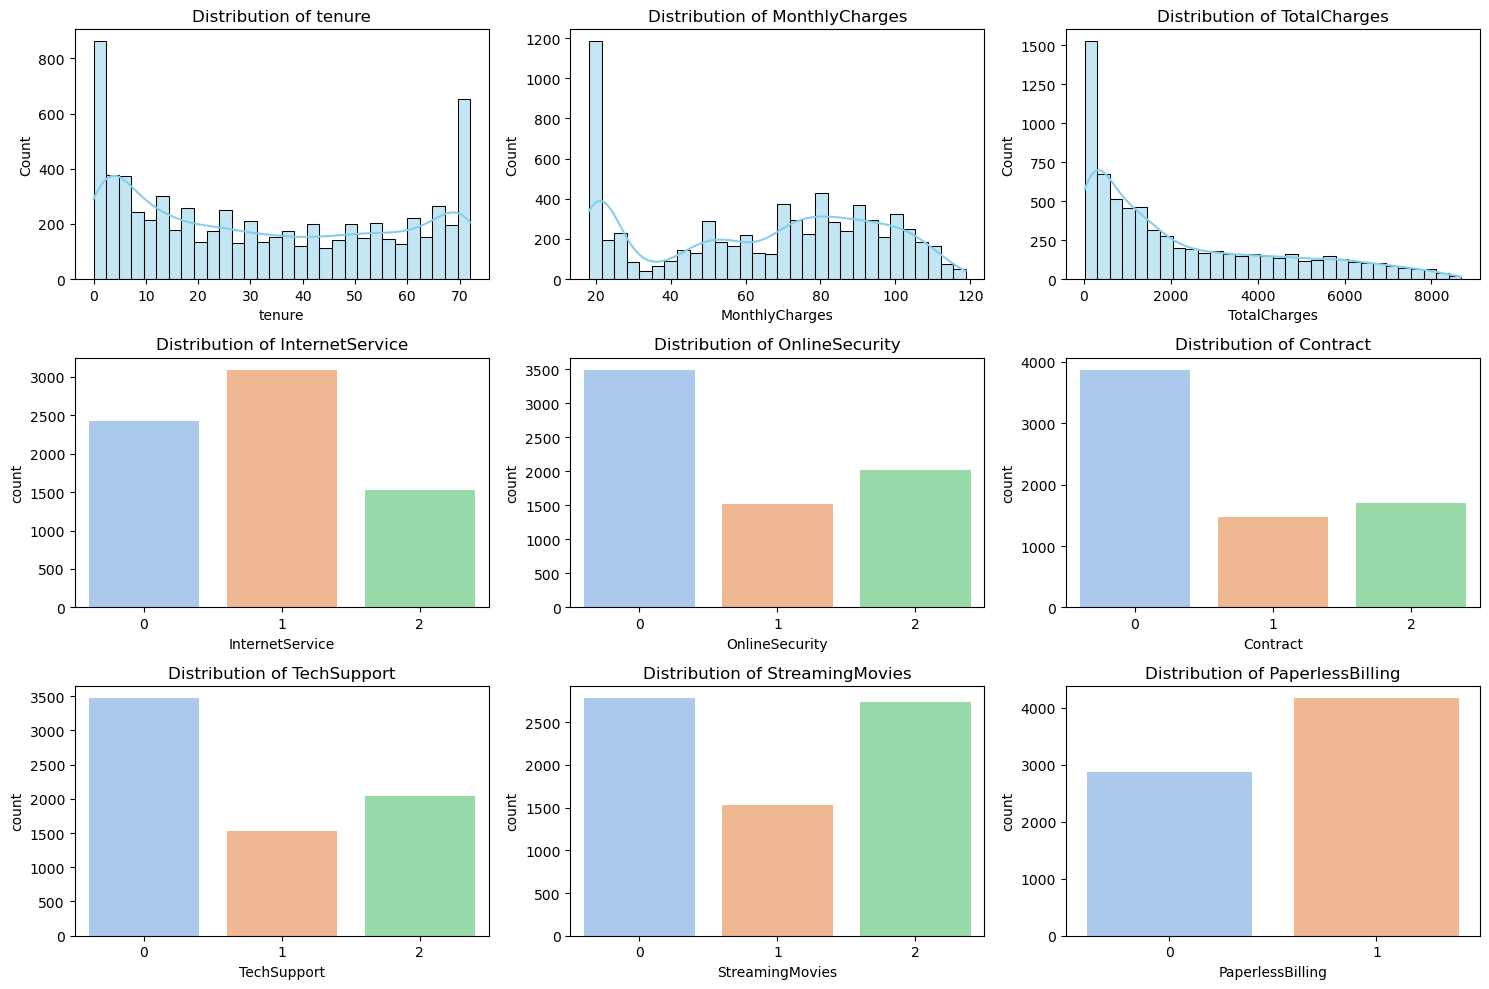

In [115]:
# Visualize Important Distributions of Feature Variables
important_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService', 'OnlineSecurity','Contract','TechSupport','StreamingMovies','PaperlessBilling']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(3, 3, i + 1)
    if data[feature].nunique() > 10:
        sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    else:
        sns.countplot(x=data[feature], palette='pastel')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

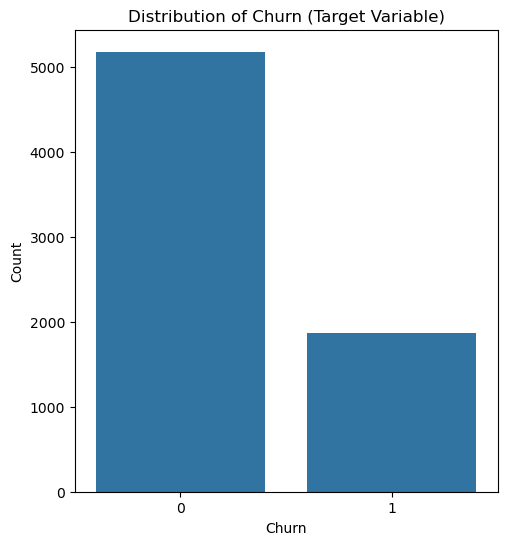

In [51]:
# Distribution of Target Variable
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 
sns.countplot(data,x='Churn') 
#plt.hist(data['Churn'], bins=30, color='skyblue', edgecolor='black', alpha=0.7) 
plt.title("Distribution of Churn (Target Variable)") 
plt.xlabel("Churn") 
plt.ylabel("Count") 
plt.show()

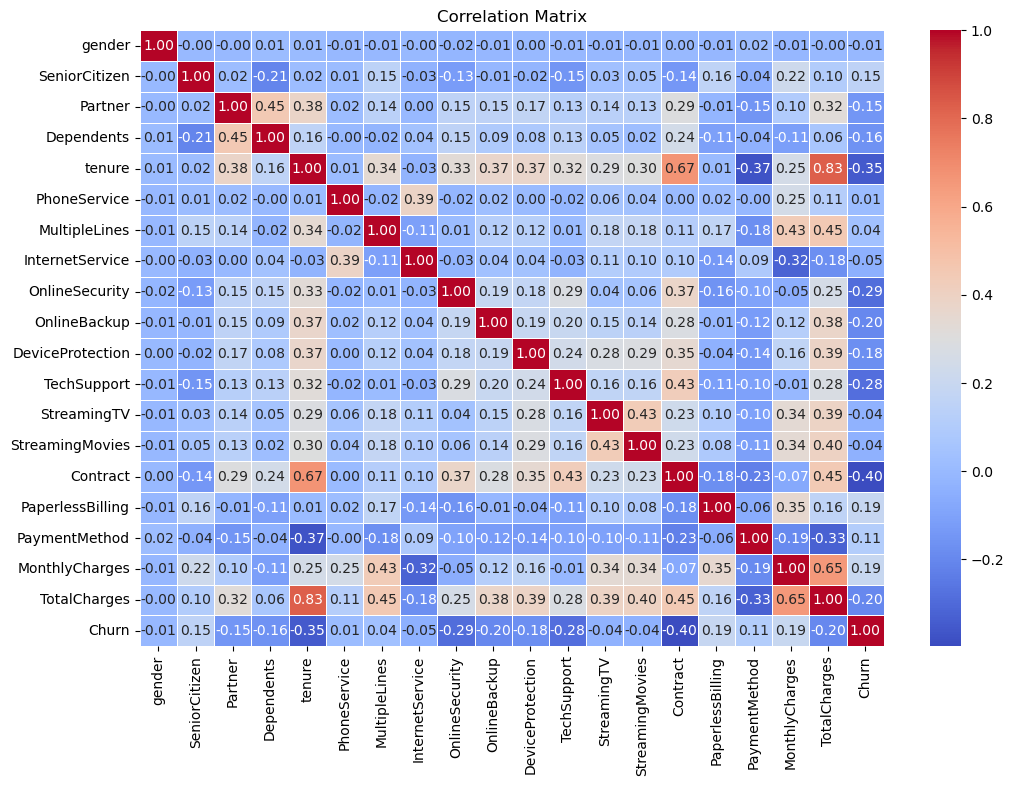

In [120]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [53]:
# Define X and y
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

### 2. Model Development and Evaluation

In [71]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Train and Evaluate Models
performance_data = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    performance_data.append([
        model_name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

In [73]:
performance_table_before_tuning = tabulate(
    performance_data,
    headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
    tablefmt="grid",
)
print("Model Performance Summary:\n",performance_table_before_tuning)

Model Performance Summary:
 +---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| Logistic Regression |   0.799858 |    0.644654 | 0.548128 |   0.592486 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |   0.790632 |    0.633898 | 0.5      |   0.559043 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |   0.779986 |    0.598765 | 0.518717 |   0.555874 |
+---------------------+------------+-------------+----------+------------+


In [81]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 18, 28],
    "min_samples_split": [2, 5, 10],
}
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring="f1"
)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_


In [77]:
# Hyperparameter Tuning for XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10],
}
xgb_grid_search = GridSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42),
    param_grid_xgb,
    cv=3,
    scoring="f1",
)
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_

In [83]:
# Evaluate Tuned Models
print("\n=== Evaluation Metrics After Hyperparameter Tuning ===")
performance_data_tuned = []
for model_name, model in {
    "Random Forest (Tuned)": rf_best_model,
    "XGBoost (Tuned)": xgb_best_model,
}.items():
    y_pred = model.predict(X_test)
    performance_data_tuned.append(
        [
            model_name,
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
        ]
    )

# Display evaluation metrics in a table format
performance_table_after_tuning = tabulate(
    performance_data_tuned,
    headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score"],
    tablefmt="grid",
)
print("Model Performance Summary:\n",performance_table_after_tuning)



=== Evaluation Metrics After Hyperparameter Tuning ===
Model Performance Summary:
 +-----------------------+------------+-------------+----------+------------+
| Model                 |   Accuracy |   Precision |   Recall |   F1 Score |
+=======================+============+=============+==========+============+
| Random Forest (Tuned) |   0.79418  |    0.641892 | 0.508021 |   0.567164 |
+-----------------------+------------+-------------+----------+------------+
| XGBoost (Tuned)       |   0.805536 |    0.671233 | 0.524064 |   0.588589 |
+-----------------------+------------+-------------+----------+------------+


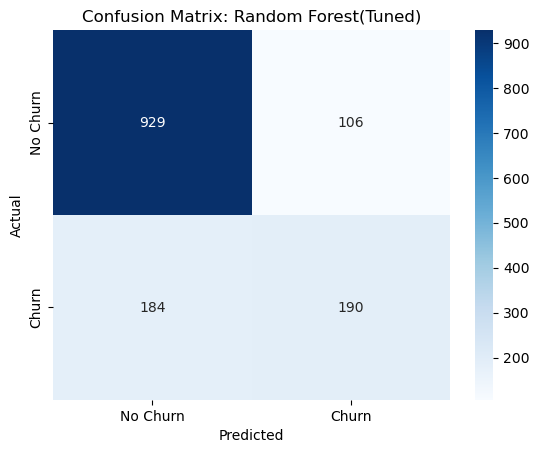

In [118]:
# Visualize Confusion Matrix for Best Model
best_model = rf_best_model
best_model_name = "Random Forest(Tuned)"
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

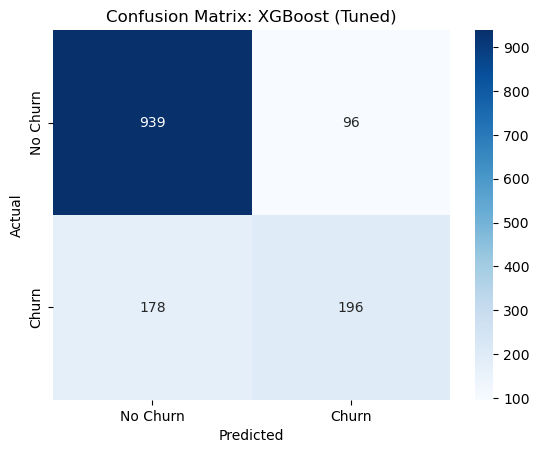

In [85]:
# Visualize Confusion Matrix for Best Model
best_model = xgb_best_model
best_model_name = "XGBoost (Tuned)"
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

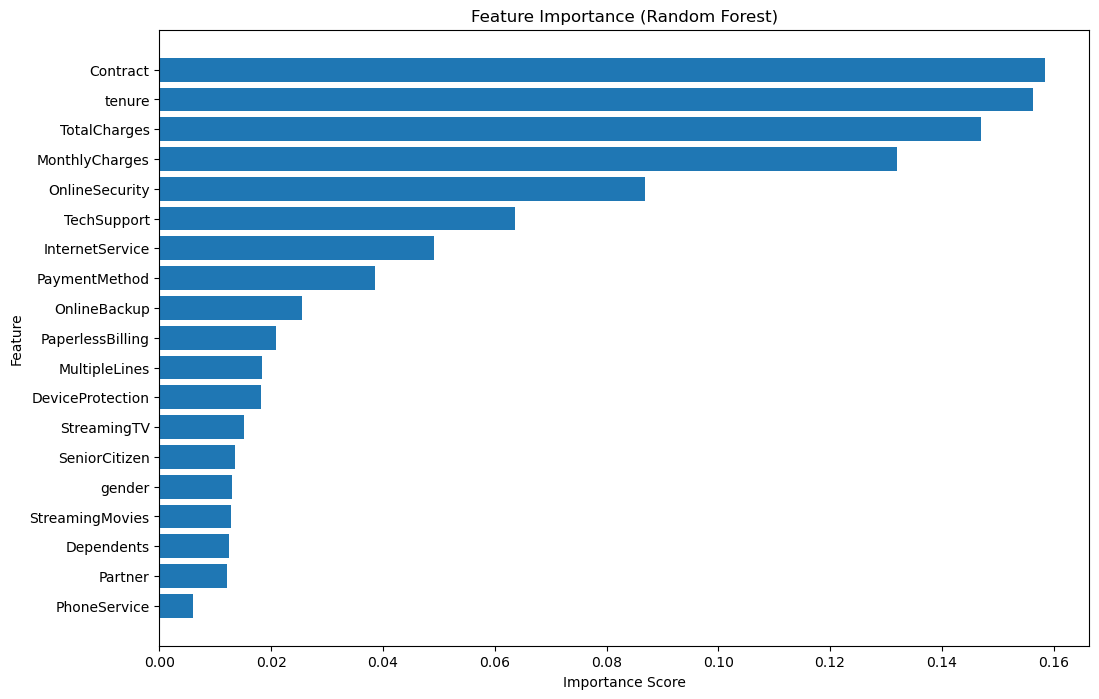

In [105]:
# Feature Importance for Random Forest
rf_feature_importances = rf_best_model.feature_importances_
rf_sorted_indices = np.argsort(rf_feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(
    [X.columns[i] for i in rf_sorted_indices],
    [rf_feature_importances[i] for i in rf_sorted_indices]#,
    #color="lightcoral",
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

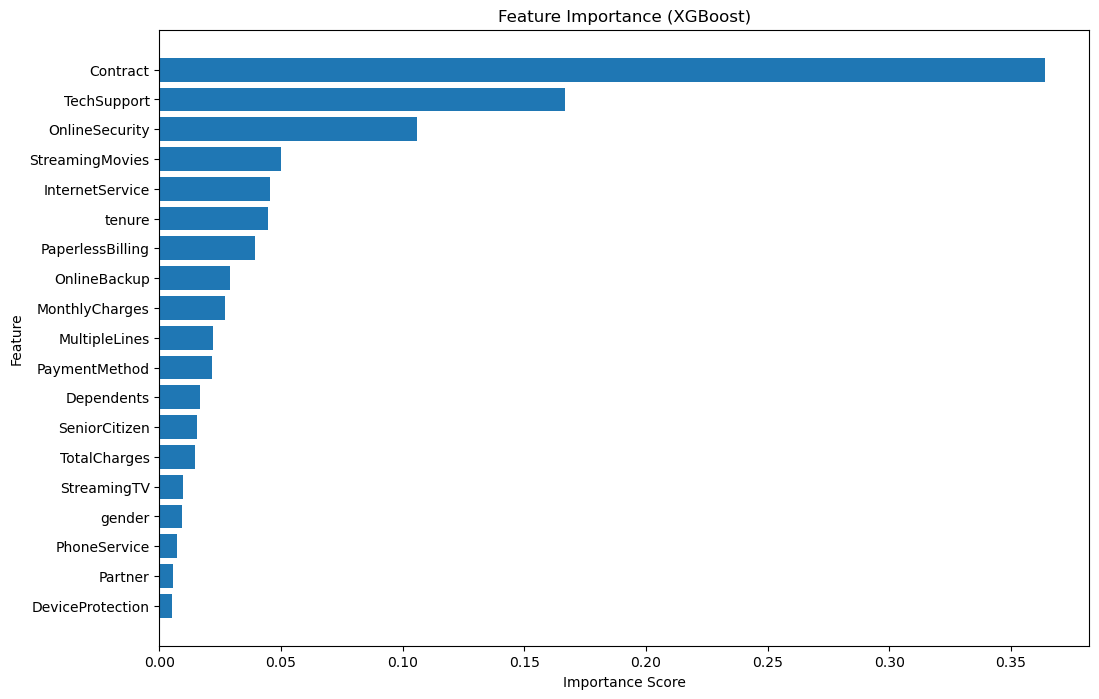

In [103]:
# Feature Importance for XGBoost
xgb_feature_importances = xgb_best_model.feature_importances_
xgb_sorted_indices = np.argsort(xgb_feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(
    [X.columns[i] for i in xgb_sorted_indices],
    [xgb_feature_importances[i] for i in xgb_sorted_indices]#,
    #color="lightcoral",
)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

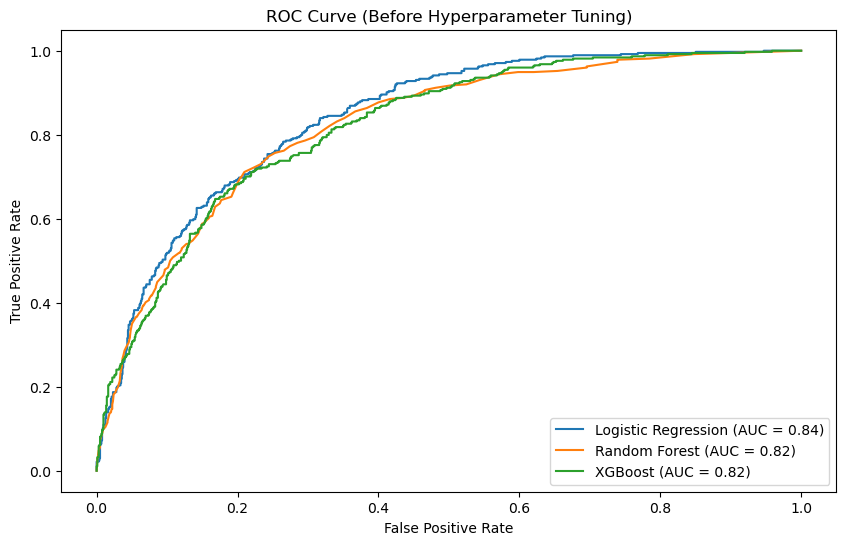

In [146]:
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

#plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve (Before Hyperparameter Tuning)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


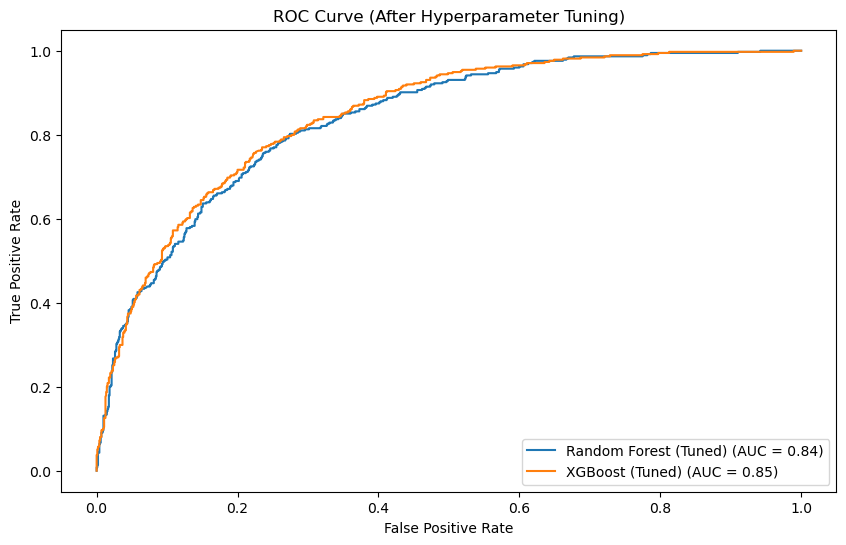

In [148]:
# Function to plot ROC curves for multiple models
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
    # Plot the diagonal line for random guessing
    #plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.title("ROC Curve (After Hyperparameter Tuning)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Combine tuned models
tuned_models = {
    "Random Forest (Tuned)": rf_best_model,
    "XGBoost (Tuned)": xgb_best_model
}

# Plot ROC Curve
plot_roc_curve(tuned_models, X_test, y_test)


In [132]:
def plot_classification_report_heatmap(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).iloc[:-1, :-1]  # Exclude 'accuracy' row and 'support'
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Classification Report: {model_name}")
    plt.tight_layout
    plt.show()



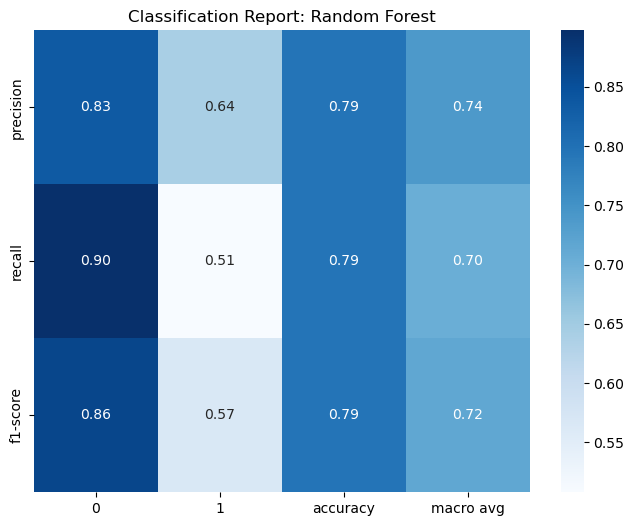

In [134]:
# Random Forest
plot_classification_report_heatmap(rf_best_model, X_test, y_test, "Random Forest")

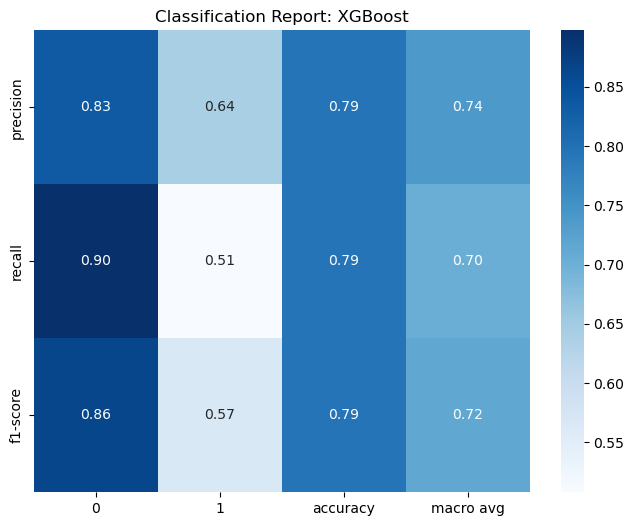

In [136]:
# XGBoost
plot_classification_report_heatmap(rf_best_model, X_test, y_test, "XGBoost")

### 3. Deliverables

#### Key Observations:

##### 1. The dataset is classified based on the Churn which is the target variable. <n>
##### 2. The model used for classification: Logistic Regression, Random Forest, XGBoost. <n>
##### 3. The target variable is not correlated with the input feature variable which is good. <n>
##### 4. There is a strong positive correlation between tenure and total charges. <n>
##### 5. Before hyperparameter tuning, Random Forest outperforms the XGBoost. However, Logistic Regression gives the best performance among all the models. <n>
##### 6. After hyperparameter tuning, XGBoost gives a good performance than Random Forest. Overall, there is almost a similar performance between Logistic Regression and XGBoost. <n>
##### 7. Contract is the most important feature variable accoring to both Random Forest and XGBoost. <n>
##### 8. Both the models, Random Forest and XGBoost show comparable performance, but XGBoost perform slightly better for predicting customer churn.


#### Recommendations:

##### 1. Company can provide customized strategies (e.g. discounts, loyalty programs) for customers identified as high-risk by the models. One can focus on long-tenure segments to minimize revenue loss. <n>
##### 2. Company can offer incentives to at-risk customers to encourage their continued engagement. <n>
##### 3. One can incorporate customer complaints and feedbacks for better prediction.